In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

In [19]:
data = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [72]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [30]:
print(data.shape)
data

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [21]:
data.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [22]:
data.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [23]:
data = data.drop_duplicates()

In [17]:
data.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [27]:
iqr = data['Sex'].quantile(0.75) - data['Sex'].quantile(0.25)
upper_threshold = data['Sex'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Sex'].quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold 

(-1.5, 2.5)

In [28]:
iqr = data['Rank'].quantile(0.75) - data['Rank'].quantile(0.25)
upper_threshold = data['Rank'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Rank'].quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold 

(-2.0, 6.0)

In [29]:
iqr = data['Year'].quantile(0.75) - data['Year'].quantile(0.25)
upper_threshold = data['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Year'].quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold 

(-9.0, 23.0)

In [31]:
iqr = data['Degree'].quantile(0.75) - data['Degree'].quantile(0.25)
upper_threshold = data['Degree'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Degree'].quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold 

(-1.5, 2.5)

In [32]:
iqr = data['YSdeg'].quantile(0.75) - data['YSdeg'].quantile(0.25)
upper_threshold = data['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['YSdeg'].quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold 

(-18.0, 48.0)

In [ ]:
# No Outliers has been found

In [34]:
num_by_sex = data.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


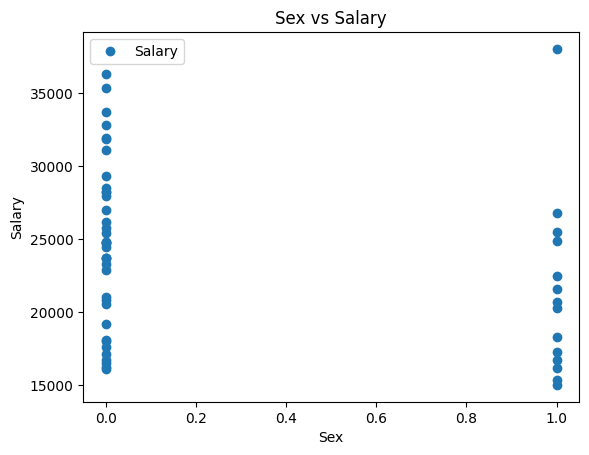

In [40]:
data.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [41]:
data[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


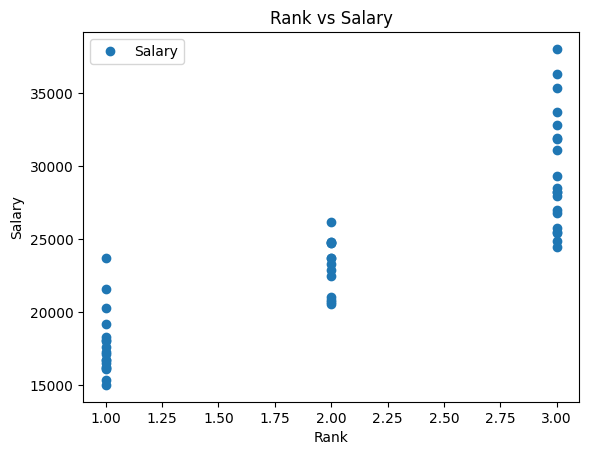

In [42]:
data.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [43]:
data[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


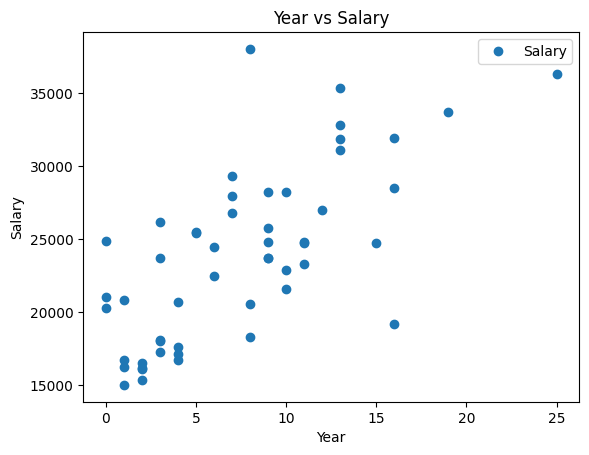

In [44]:
data.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [45]:
data[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


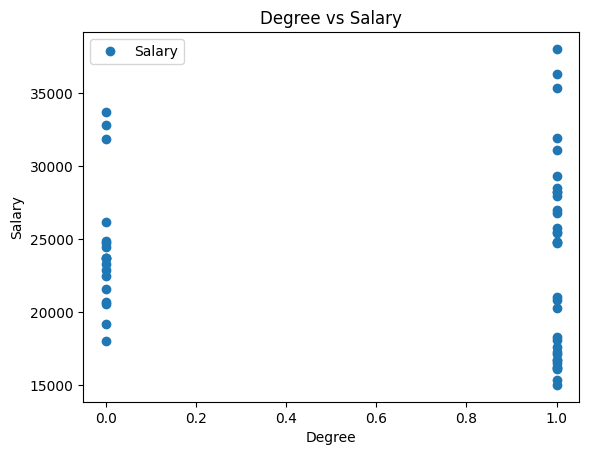

In [46]:
data.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [47]:
data[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


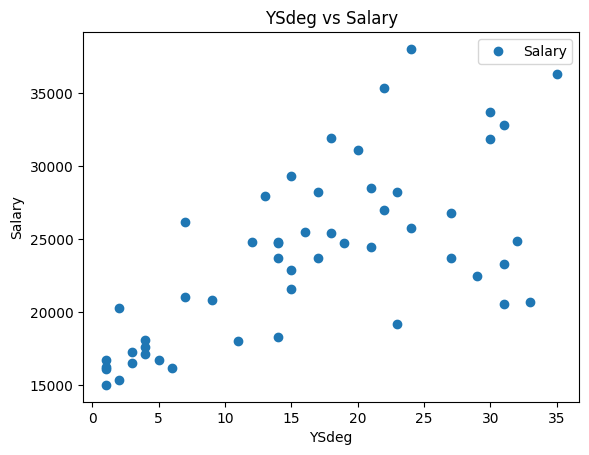

In [48]:
data.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [49]:
data[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [50]:
X = data[['Sex', 'Rank', 'Year','YSdeg']].values 
y = data['Salary'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,394.187583
Rank,4515.037436
Year,2038.130073
YSdeg,-635.924939


In [56]:
regressor.intercept_ 

23550.829268292684

In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,24750,26342.024703
1,25400,27589.277806
2,20690,21874.596417
3,24450,27793.520125
4,29342,28588.913149
5,15350,17913.701839
6,36350,34498.510886
7,22906,24598.295580
8,16094,17113.027681
9,23712,23408.802087


In [58]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8943201439448739


In [85]:
def lin_reg_wrt_focus(salary_discrim_cols, data, focus='Salary'):
    input_cols = data[salary_discrim_cols]
    focus_output = data[focus]
    regr_sd = LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [86]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [87]:
combos = get_combos(salary_discrim_cols)

In [88]:
def all_combo_scores(combos, data, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), data, focus)] = n
    return combo_scores

In [89]:
combo_scores = all_combo_scores(combos, data)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274631, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 

In [82]:
The selection with the best  score is: Sex, Rank, Year, YSdeg: 0.85471806744109691 (as seen above)

However, although including all of the columns produces the highest  score, there are two dominant factors: Year and Rank. 
Just these two factors taken together have a score of 0.84364809332645985.

It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), 
indicating that it has no direct influence on salary.